# OBJECTIVE OF THE PROJECT:
"Practicing Predictive Modeling for Car Pricing"

## Step1:Import neccessary libry

In [432]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action = 'ignore',category= FutureWarning )

## Step2:Read dataset

In [433]:
df = pd.read_excel('automobile_ml_November_2024.xlsx')
df.head(3)

,make,price,Mileage,Repair_record,headroom,trunk space,weight,length,turn_cercle,displacement,gear_ratio,foreign(car_type)
0,AMC Concord,4099,22,Average,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,Average,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic


In [434]:
df.tail(3)

,make,price,Mileage,Repair_record,headroom,trunk space,weight,length,turn_cercle,displacement,gear_ratio,foreign(car_type)
71,VW Rabbit,4697,25,Good,3.0,15,1930,155,35,89,3.78,Foreign
72,VW Scirocco,6850,25,Good,2.0,16,1990,156,36,97,3.78,Foreign
73,Volvo 260,11995,17,Excellent,2.5,14,3170,193,37,163,2.98,Foreign


## Step3:Sanity check of data

In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               74 non-null     object 
 1   price              74 non-null     int64  
 2   Mileage            74 non-null     int64  
 3   Repair_record      69 non-null     object 
 4   headroom           74 non-null     float64
 5   trunk space        74 non-null     int64  
 6   weight             74 non-null     int64  
 7   length             74 non-null     int64  
 8   turn_cercle        74 non-null     int64  
 9   displacement       74 non-null     int64  
 10  gear_ratio         74 non-null     float64
 11  foreign(car_type)  74 non-null     object 
dtypes: float64(2), int64(7), object(3)
memory usage: 7.1+ KB


In [436]:
df.shape

(74, 12)

In [437]:
df.dtypes

make                  object
price                  int64
Mileage                int64
Repair_record         object
headroom             float64
trunk space            int64
weight                 int64
length                 int64
turn_cercle            int64
displacement           int64
gear_ratio           float64
foreign(car_type)     object
dtype: object

In [438]:
# MISSING DATA
df.isna().sum()/len(df)*100

make                 0.000000
price                0.000000
Mileage              0.000000
Repair_record        6.756757
headroom             0.000000
trunk space          0.000000
weight               0.000000
length               0.000000
turn_cercle          0.000000
displacement         0.000000
gear_ratio           0.000000
foreign(car_type)    0.000000
dtype: float64

In [439]:
# check of the duplicates
df.duplicated().sum()

0

In [440]:
# identifyuing the garbage values
for i in df.select_dtypes(include = 'object').columns:
    print(df[i].value_counts())
    print(i*10)                                               # garbage value always are object



make
AMC Concord        1
Datsun 200         1
Audi Fox           1
Audi 5000          1
Pont. Sunbird      1
                  ..
Ford Mustang       1
Ford Fiesta        1
Dodge St. Regis    1
Dodge Magnum       1
Volvo 260          1
Name: count, Length: 74, dtype: int64
makemakemakemakemakemakemakemakemakemake
Repair_record
Average      30
Good         18
Excellent    11
Fair          8
Poor          2
Name: count, dtype: int64
Repair_recordRepair_recordRepair_recordRepair_recordRepair_recordRepair_recordRepair_recordRepair_recordRepair_recordRepair_record
foreign(car_type)
Domestic    52
Foreign     22
Name: count, dtype: int64
foreign(car_type)foreign(car_type)foreign(car_type)foreign(car_type)foreign(car_type)foreign(car_type)foreign(car_type)foreign(car_type)foreign(car_type)foreign(car_type)


## EXPLORATORY DATA ANALYSIS

In [441]:
# Descriptive statistics

In [442]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,74.0,6165.256757,2949.495885,3291.00,4220.25,5006.500,6332.2500,15906.00
Mileage,74.0,21.297297,5.785503,12.00,18.00,20.000,24.7500,41.00
headroom,74.0,2.993243,0.845995,1.50,2.50,3.000,3.5000,5.00
trunk space,74.0,13.756757,4.277404,5.00,10.25,14.000,16.7500,23.00
weight,74.0,3019.459459,777.193567,1760.00,2250.00,3190.000,3600.0000,4840.00
length,74.0,187.932432,22.266340,142.00,170.00,192.500,203.7500,233.00
turn_cercle,74.0,39.648649,4.399354,31.00,36.00,40.000,43.0000,51.00
displacement,74.0,197.297297,91.837219,79.00,119.00,196.000,245.2500,425.00
gear_ratio,74.0,3.014865,0.456287,2.19,2.73,2.955,3.3525,3.89


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'Mileage'}>,
        <Axes: title={'center': 'headroom'}>],
       [<Axes: title={'center': 'trunk space'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'length'}>],
       [<Axes: title={'center': 'turn_cercle'}>,
        <Axes: title={'center': 'displacement'}>,
        <Axes: title={'center': 'gear_ratio'}>]], dtype=object)

<Figure size 2000x10000 with 0 Axes>

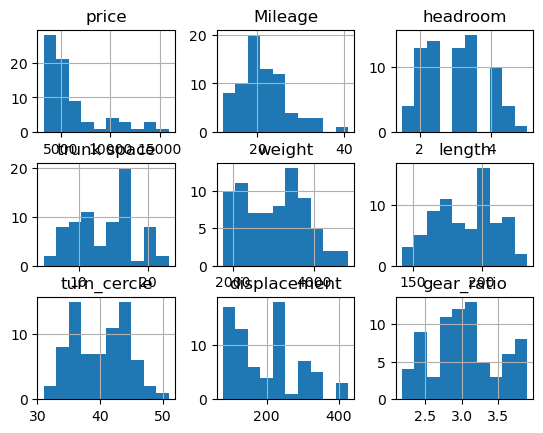

In [443]:
plt.figure(figsize = (20,100))
df.hist()             # plotting the descriptional results 

In [444]:
df.describe(include = 'object').T

,count,unique,top,freq
make,74,74,AMC Concord,1
Repair_record,69,5,Average,30
foreign(car_type),74,2,Domestic,52


In [445]:
# Histogram for data distribution

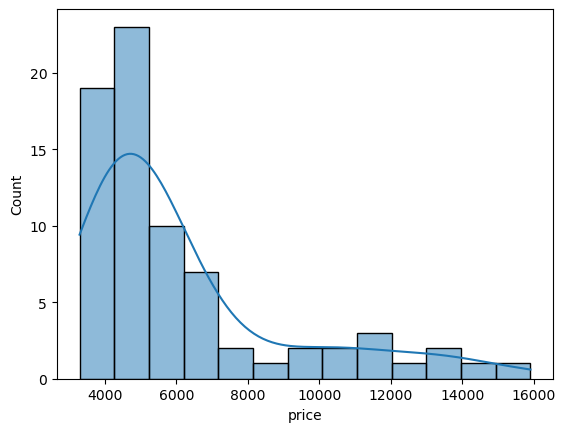

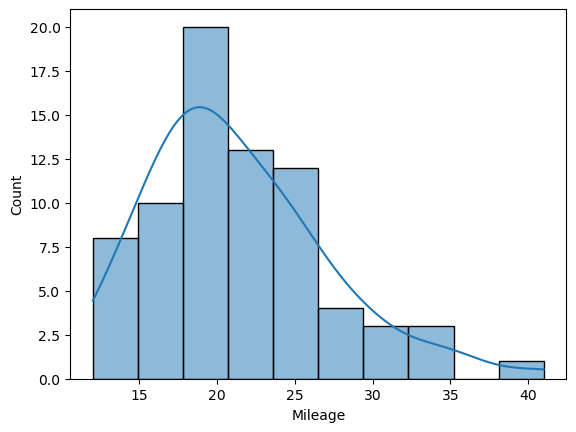

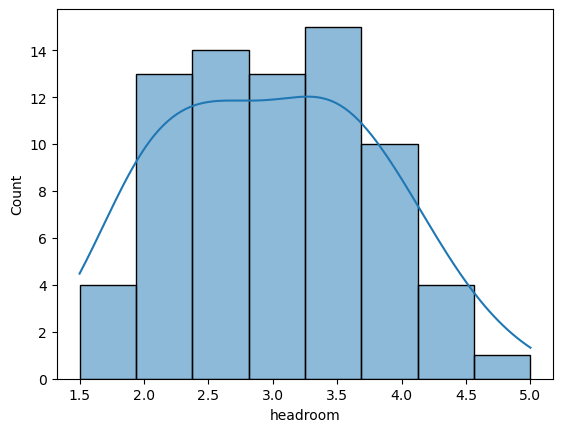

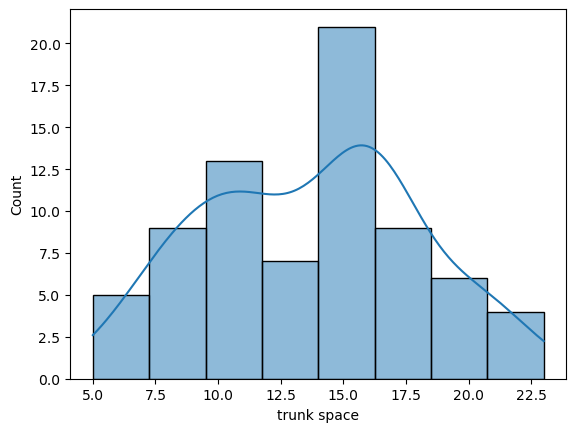

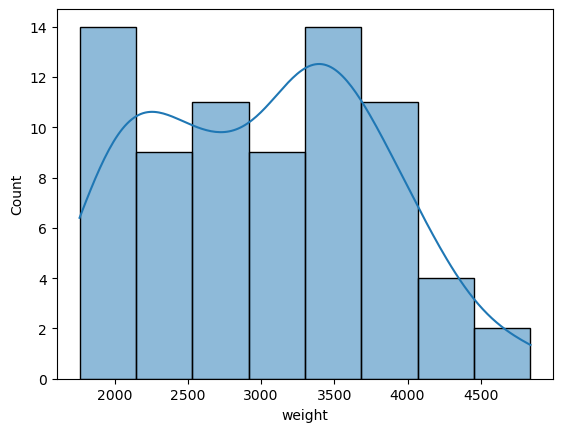

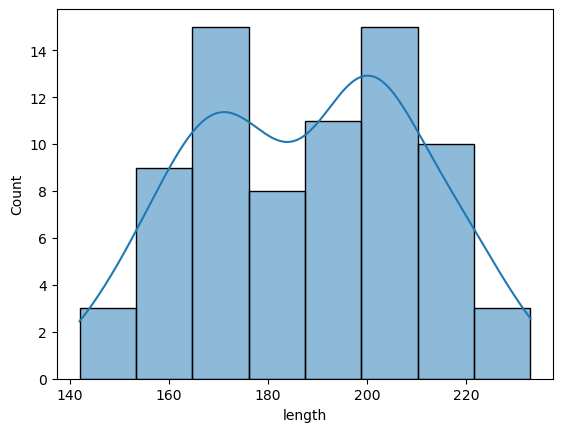

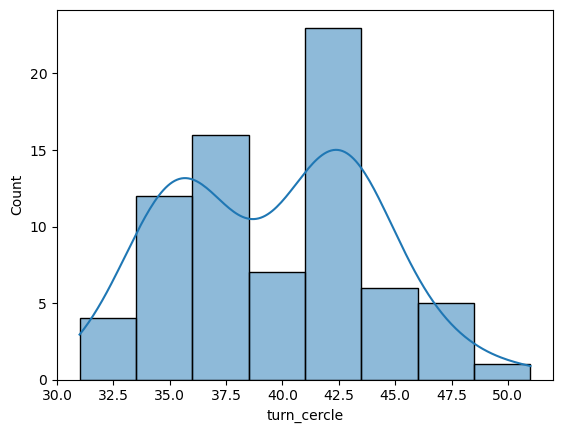

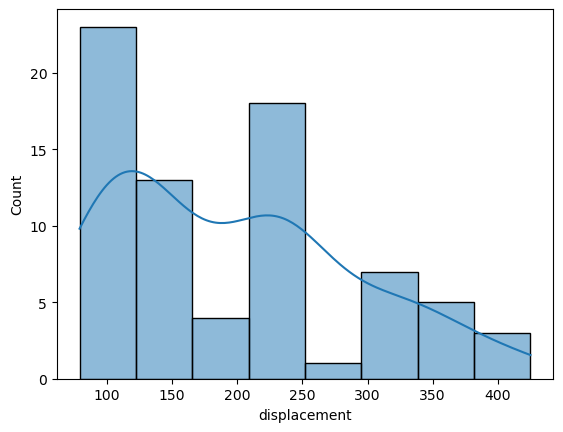

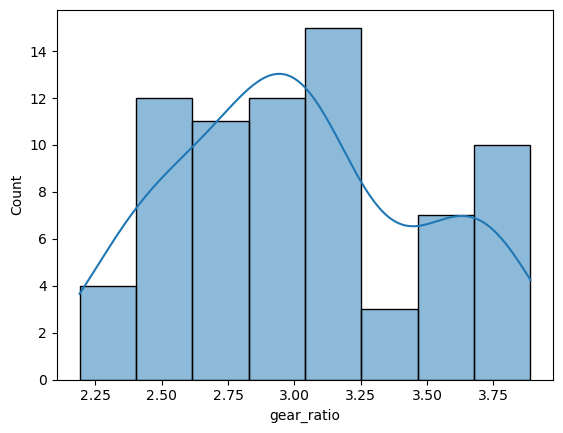

In [446]:
for i in df.select_dtypes(include = 'number').columns:
    sns.histplot(data = df, x = i, kde = True)
    plt.show()

In [447]:
# Boxplot to identify the outliers 

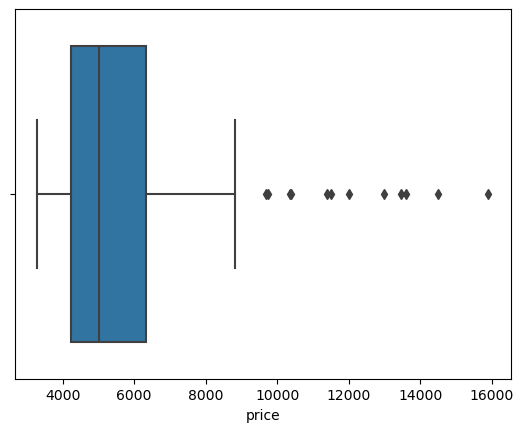

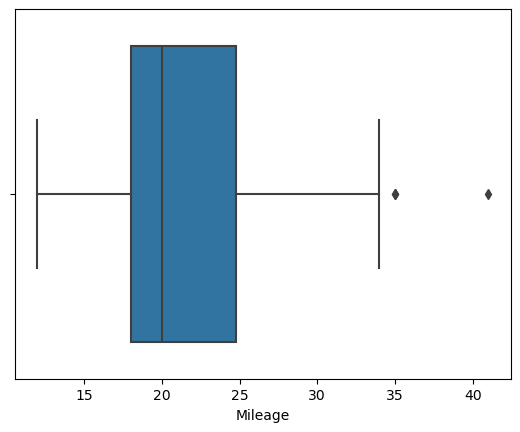

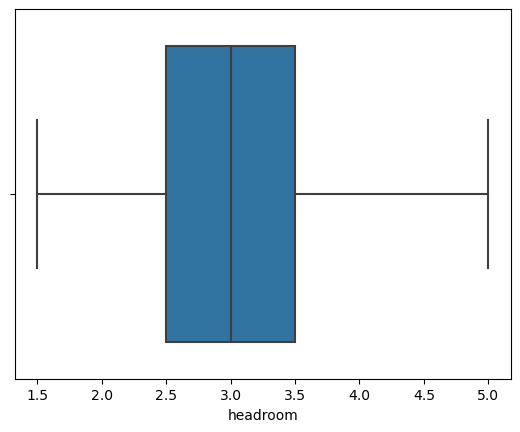

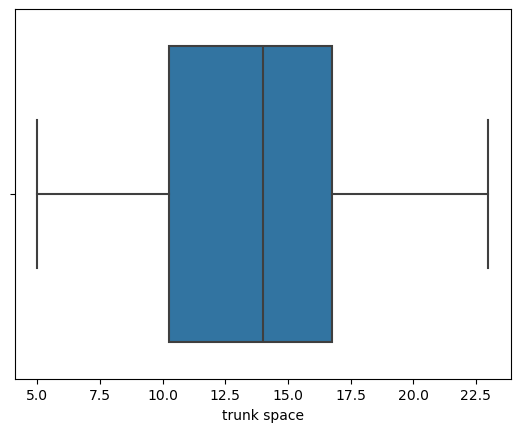

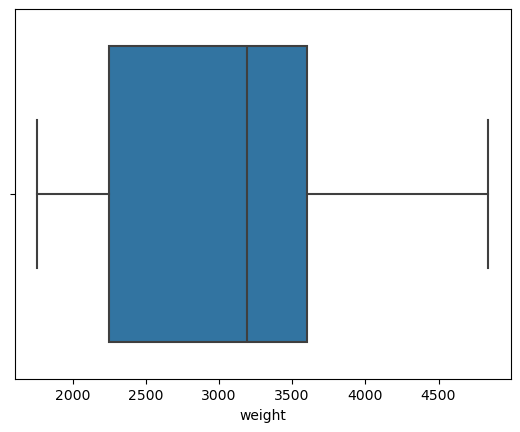

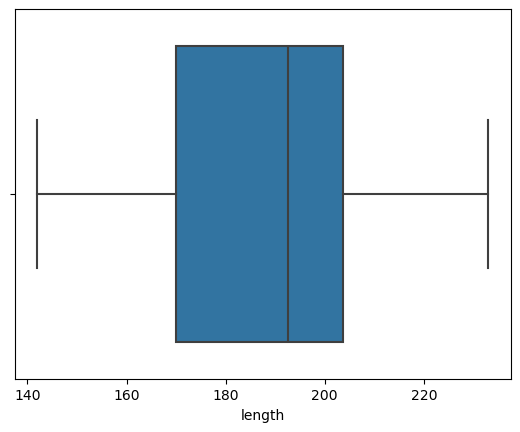

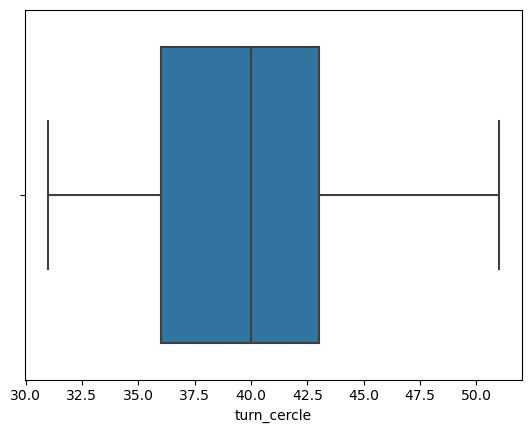

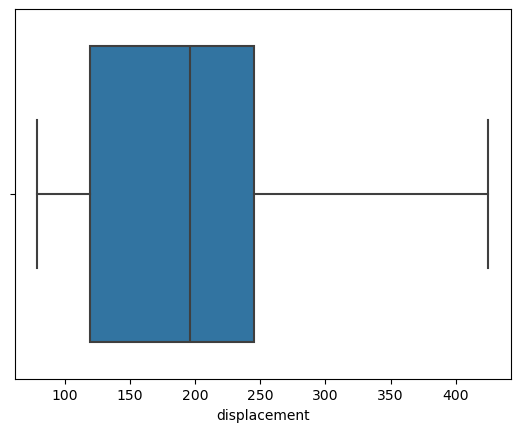

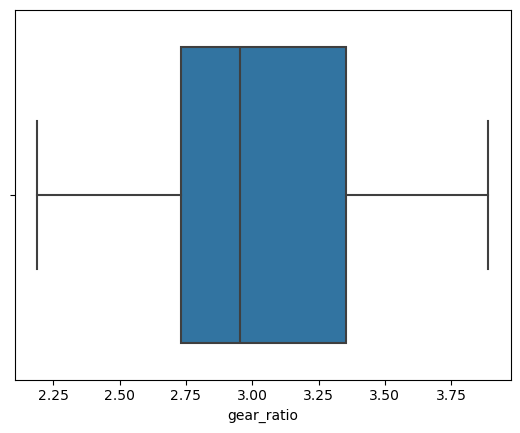

In [448]:
for i in df.select_dtypes(include = 'number').columns:
    sns.boxplot(data = df, x = i)
    plt.show()

In [449]:
# Scatter plot to understand the relationship 

In [450]:
df.select_dtypes(include = 'number').columns

Index(['price', 'Mileage', 'headroom', 'trunk space', 'weight', 'length',
       'turn_cercle', 'displacement', 'gear_ratio'],
      dtype='object')

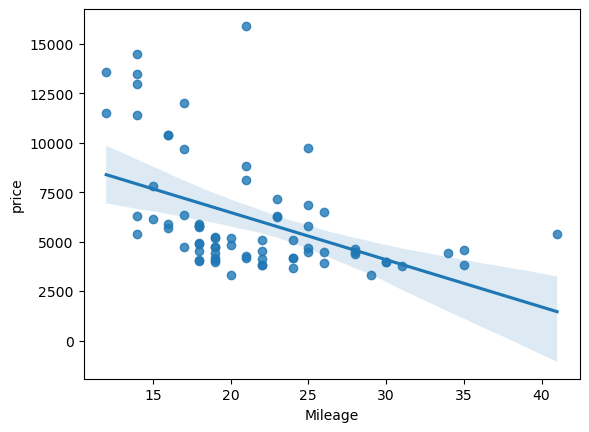

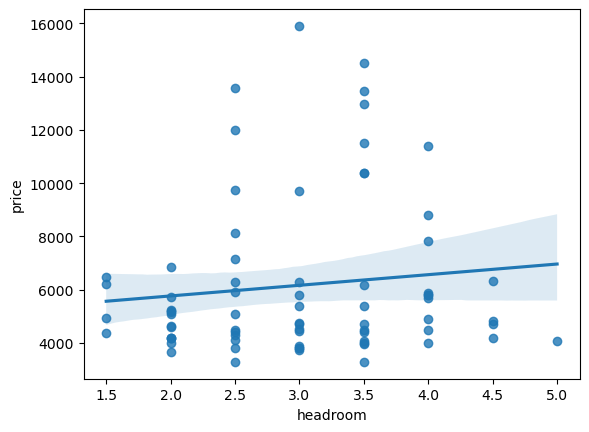

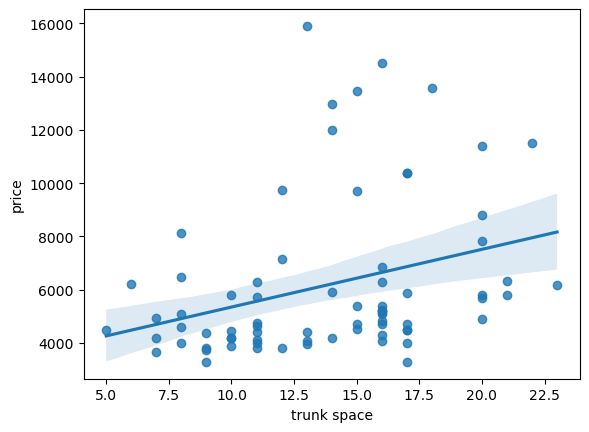

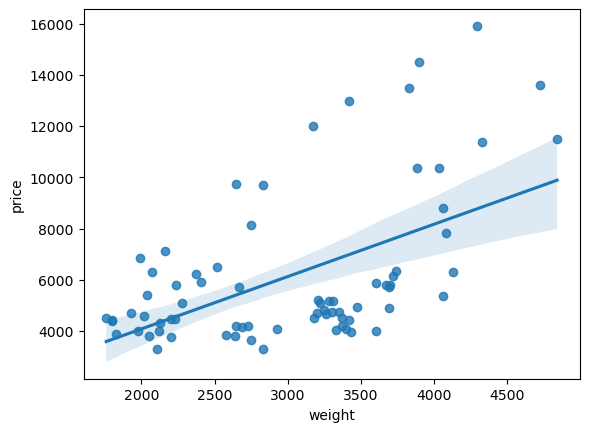

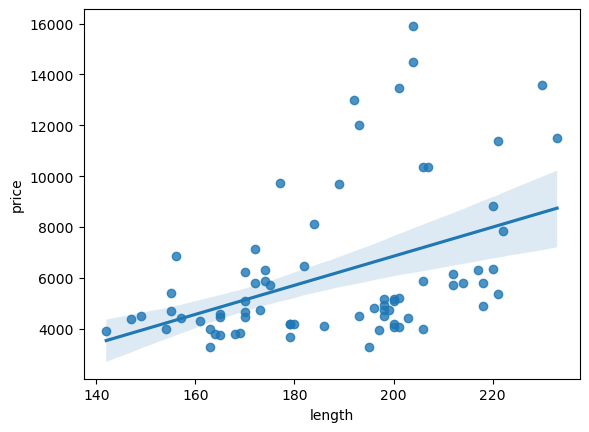

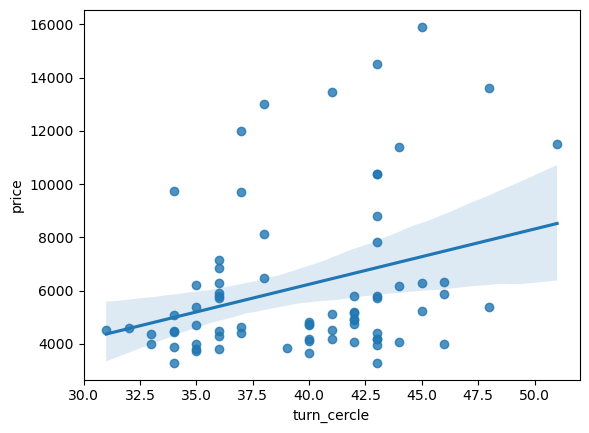

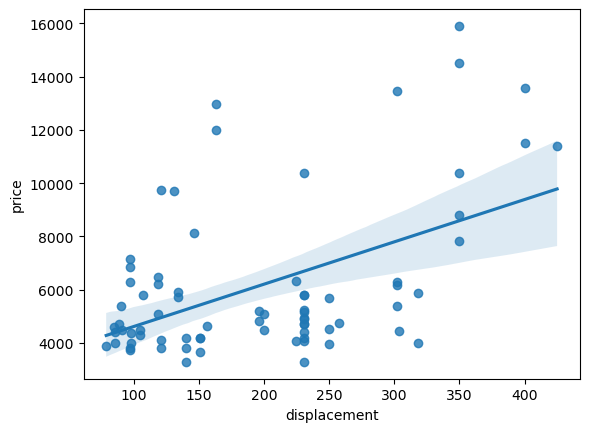

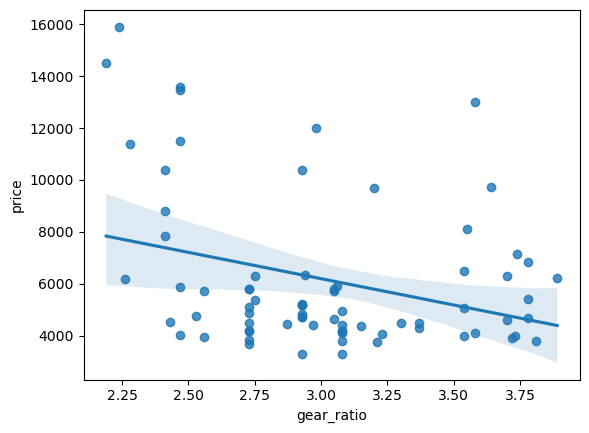

In [451]:
for i in ['Mileage', 'headroom', 'trunk space', 'weight', 'length',
       'turn_cercle', 'displacement', 'gear_ratio']:
    sns.regplot(data = df, x = i, y = 'price')
    plt.show()

In [452]:
# correlation with heatmap to interpret the relation and multicollineality

In [453]:
df.select_dtypes( include = 'number').corr()


,price,Mileage,headroom,trunk space,weight,length,turn_cercle,displacement,gear_ratio
price,1.000000,-0.468597,0.114506,0.314332,0.538611,0.431831,0.309617,0.494943,-0.313661
Mileage,-0.468597,1.000000,-0.413803,-0.581585,-0.807175,-0.795779,-0.719186,-0.705643,0.616177
headroom,0.114506,-0.413803,1.000000,0.662011,0.483456,0.516295,0.424465,0.474491,-0.377852
trunk space,0.314332,-0.581585,0.662011,1.000000,0.672206,0.726596,0.601059,0.608635,-0.508665
weight,0.538611,-0.807175,0.483456,0.672206,1.000000,0.946009,0.857443,0.894896,-0.759258
length,0.431831,-0.795779,0.516295,0.726596,0.946009,1.000000,0.864261,0.835140,-0.696383
turn_cercle,0.309617,-0.719186,0.424465,0.601059,0.857443,0.864261,1.000000,0.776765,-0.676300
displacement,0.494943,-0.705643,0.474491,0.608635,0.894896,0.835140,0.776765,1.000000,-0.828877
gear_ratio,-0.313661,0.616177,-0.377852,-0.508665,-0.759258,-0.696383,-0.676300,-0.828877,1.000000


In [454]:
corr_matrix= df.select_dtypes( include = 'number').corr()
threshold = 0.8

# Find pairs of columns with correlation higher than the threshold
high_corr_pairs = [(col1, col2) for col1 in corr_matrix.columns for col2 in corr_matrix.columns 
                   if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > threshold]

# Output the high correlation pairs
print(high_corr_pairs)

[('Mileage', 'weight'), ('weight', 'Mileage'), ('weight', 'length'), ('weight', 'turn_cercle'), ('weight', 'displacement'), ('length', 'weight'), ('length', 'turn_cercle'), ('length', 'displacement'), ('turn_cercle', 'weight'), ('turn_cercle', 'length'), ('displacement', 'weight'), ('displacement', 'length'), ('displacement', 'gear_ratio'), ('gear_ratio', 'displacement')]


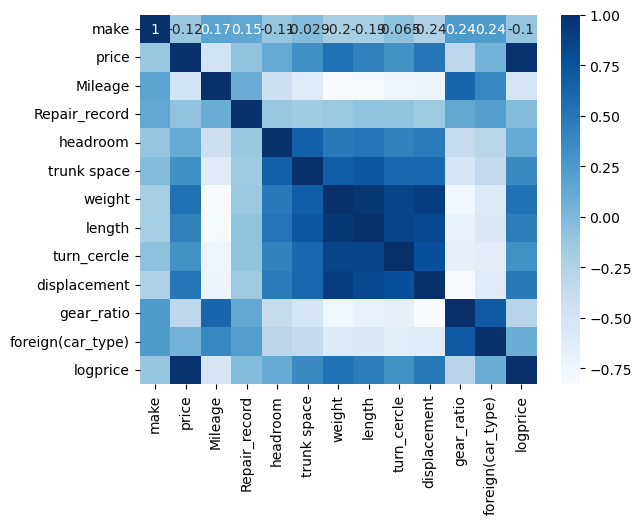

In [485]:
correlation_matrix = df.select_dtypes( include = 'number')
sns. heatmap(correlation_matrix.corr(),annot = True, cmap = "Blues")
plt.show()

In [487]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming 'df' is your dataframe
X = df.select_dtypes(include='number')  # Use only numerical columns
X = add_constant(X)  # Adds a constant column to calculate VIF for intercept

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print(vif_data)

              Feature           VIF
0               const  19498.029373
1                make      1.255413
2               price     45.047169
3             Mileage      3.727039
4       Repair_record      1.258730
5            headroom      2.186116
6         trunk space      3.502932
7              weight     20.767726
8              length     15.289692
9         turn_cercle      5.555495
10       displacement      7.371782
11         gear_ratio      4.368276
12  foreign(car_type)      3.575098
13           logprice     49.116960


# Step5: Missing value treatment

In [456]:
df.isna().sum()/len(df)*100

make                 0.000000
price                0.000000
Mileage              0.000000
Repair_record        6.756757
headroom             0.000000
trunk space          0.000000
weight               0.000000
length               0.000000
turn_cercle          0.000000
displacement         0.000000
gear_ratio           0.000000
foreign(car_type)    0.000000
dtype: float64

In [457]:
df['Repair_record'].fillna("Average",inplace = True)

# Step6: Outliers treatment

In [458]:
# To decide wether to do outlier treatment or not. if you do it, how?
# NB. Outlier treatment is done for continous data only

In [459]:
def wisker(col):
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3-Q1
    lw = Q1-1.5*IQR
    uw = Q3 + 1.5*IQR
    return lw,uw

In [460]:
wisker(df['Mileage'])

(7.875, 34.875)

In [461]:
for i in['Mileage']:
    lw,up = wisker(df[i])
    df[i] = np.where (df[i]<lw,lw, df[i])
    df[i]= np.where (df[i]>up,up,df[i])

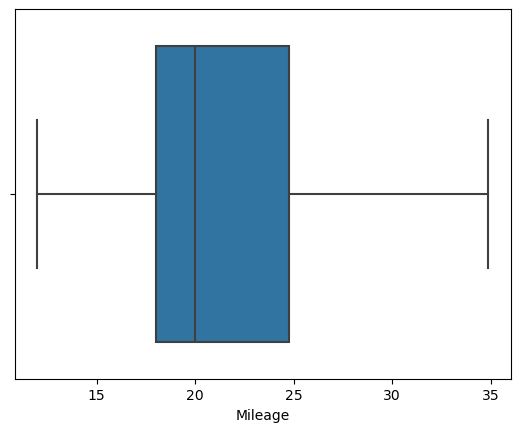

In [462]:
for i in['Mileage']:
    sns.boxplot(data = df, x = i)
    plt.show()

# Step7: Duplicates and garbage value treatments


# Step8: Normalization


In [463]:
df['logprice'] = np.log1p(df['price'])
df['logprice'] 

0     8.318742
1     8.465900
2     8.242756
3     8.479907
4     8.965462
        ...   
69    8.873608
70    8.593784
71    8.454892
72    8.832150
73    9.392329
Name: logprice, Length: 74, dtype: float64

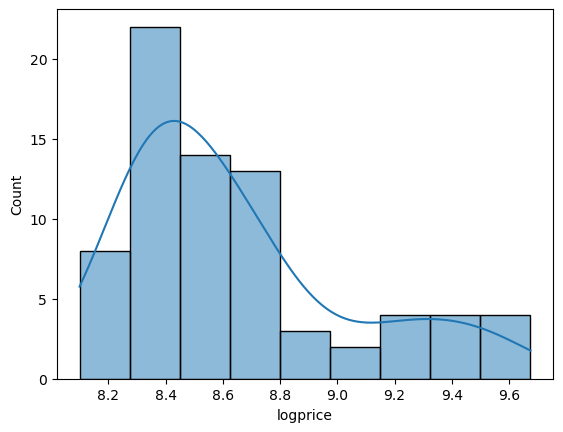

In [464]:
sns.histplot(df['logprice'],kde = True );

# Step9: Encoding of data

In [486]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['Repair_record'] =label_encoder.fit_transform(df['Repair_record'])
df['foreign(car_type)'] =label_encoder.fit_transform(df['foreign(car_type)'])
df['make'] =label_encoder.fit_transform(df['make'])

df.head(3)

,make,price,Mileage,Repair_record,headroom,trunk space,weight,length,turn_cercle,displacement,gear_ratio,foreign(car_type),logprice
0,0,4099,22.0,0,2.5,11,2930,186,40,121,3.58,0,8.318742
1,1,4749,17.0,0,3.0,11,3350,173,40,258,2.53,0,8.465900
2,2,3799,22.0,0,3.0,12,2640,168,35,121,3.08,0,8.242756


# Modeling the predictive variables

In [466]:
from sklearn.model_selection import train_test_split
df.columns

Index(['make', 'price', 'Mileage', 'Repair_record', 'headroom', 'trunk space',
       'weight', 'length', 'turn_cercle', 'displacement', 'gear_ratio',
       'foreign(car_type)', 'logprice'],
      dtype='object')

In [467]:
#1.Definition of target and predictorstarg
X =  df[['make','Mileage', 'Repair_record', 'headroom', 'trunk space', 'turn_cercle','displacement','gear_ratio','foreign(car_type)']]
y = df[['logprice']].values.flatten() 

#2. split the varaiables linear regresion
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [468]:
X_test

,make,Mileage,Repair_record,headroom,trunk space,turn_cercle,displacement,gear_ratio,foreign(car_type)
4,7,15.000,3,4.0,20,43,350,2.41,0
63,52,14.000,0,3.5,14,38,163,3.58,1
18,21,19.000,0,3.5,13,43,250,2.56,0
0,0,22.000,0,2.5,11,40,121,3.58,0
28,39,22.000,3,3.0,9,39,140,2.73,0
73,73,17.000,1,2.5,14,37,163,2.98,1
10,13,14.000,0,4.0,20,44,425,2.28,0
34,45,21.000,3,4.0,20,43,350,2.41,0
12,15,21.000,0,3.0,13,45,350,2.24,0
55,22,23.000,3,1.5,6,35,119,3.89,1


In [469]:
# Initialize the linear regression model

from sklearn.linear_model import LinearRegression
linear_models = LinearRegression()

# Fitting the model/Train the model

modelr = linear_models.fit(X_train,y_train)
modelr

LinearRegression()

In [470]:
from sklearn.tree import DecisionTreeRegressor

decisiontree = DecisionTreeRegressor()
modeldt = decisiontree.fit(X_train,y_train)
modeldt

DecisionTreeRegressor()

In [471]:
from sklearn.ensemble import RandomForestRegressor
randomforest = RandomForestRegressor()
modelrf = randomforest.fit(X_train,y_train)
modelrf

RandomForestRegressor()

In [472]:
# linear model coefficient
coef = linear_models.coef_
coef 
for i, j in zip (X_train.columns, coef):
    print(f"{i} = {j}")

make = -0.0019537516110824872
Mileage = -0.025975713802432708
Repair_record = -0.002300374308575791
headroom = -0.1329921137648866
trunk space = 0.018421228865991148
turn_cercle = -0.00448719943741483
displacement = 0.002383731573951128
gear_ratio = 0.15800555410661424
foreign(car_type) = 0.3095897020385227


In [473]:
#feature importances of decision trees model
feature = modeldt.feature_importances_
for i,j in zip(X_train.columns, feature):
    print(f"{i} = {j}")

make = 0.039245925546975834
Mileage = 0.4421935759325471
Repair_record = 0.008202092164377459
headroom = 0.005244197665945621
trunk space = 0.013424994740288621
turn_cercle = 0.06865304517781125
displacement = 0.3142612688118237
gear_ratio = 0.10725277368883546
foreign(car_type) = 0.0015221262713950193


In [474]:
feature_random = modelrf.feature_importances_
for i,j in zip(X_train.columns, feature_random):
    print(f"{i} = {j}")

make = 0.08419312229115991
Mileage = 0.37441148080398606
Repair_record = 0.05695687334463413
headroom = 0.02927617733073893
trunk space = 0.04401036696607263
turn_cercle = 0.06760845489514361
displacement = 0.16278146428378226
gear_ratio = 0.15729284397707174
foreign(car_type) = 0.023469216107410613


In [475]:
# Make linear regression predictions on the test set
predictions_lm = linear_models.predict(X_test)

#Make Decision trees regression predictions on the test set
predictions_dt = modeldt.predict(X_test)

#Make random forestregression predictions on the test set

predictions_rf = modelrf.predict(X_test)

print('y_predictions in linear regression',predictions_lm)
print('y_predictions of decisiontrees regression',predictions_dt)
print('y_predictions random forest regression',predictions_rf)

y_predictions in linear regression [8.99644409 8.96850518 8.59496497 8.52134216 8.25037958 8.88992486
 9.17135037 8.76634725 8.80006909 8.86260871 8.36428083 8.67168409
 8.65390792 8.44356362 8.70878327 8.62805057 8.68576109 8.55173314
 8.4176903  8.34778371 8.34476184 8.6877452  8.81853139]
y_predictions of decisiontrees regression [9.58197289 9.1789529  8.24275635 9.18358563 8.77755545 9.24696156
 9.58197289 8.49515206 8.24275635 8.8736081  8.74766979 8.50410795
 8.24275635 8.56082723 8.47990661 9.24696156 8.20740183 8.33854488
 8.77755545 8.33639048 8.45489217 8.29679587 8.46041118]
y_predictions random forest regression [9.12267573 9.08616286 8.44888357 8.72150458 8.47200615 8.86617785
 9.24770483 8.73679573 8.77494096 8.69393607 8.54517729 8.64959541
 8.45137876 8.5924718  8.53406363 8.65146861 8.65825771 8.45575582
 8.4314356  8.42451471 8.40576188 8.45077668 8.51373356]


In [476]:
# Evaluation of metrics of the model

from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import math
#1. metrics of  linear regression 
MAE_lm = mean_squared_error(y_test,predictions_lm)
MSE_lm =mean_absolute_error(y_test,predictions_lm)
RMSE_lm =math.sqrt(MSE)
r2_lm = r2_score(y_test, predictions_lm)

#2. metrics of  decision trees
MAE_dt = mean_squared_error(y_test,predictions_dt)
MSE_dt =mean_absolute_error(y_test,predictions_dt)
RMSE_dt =math.sqrt(MSE)
r2_dt =r2_score(y_test,predictions_dt)

#3. metrics of random forest regression
MAE_rf= mean_squared_error(y_test,predictions_rf)
MSE_rf =mean_absolute_error(y_test,predictions_rf)
RMSE_rf =math.sqrt(MSE)
r2_rf =r2_score(y_test,predictions_rf)

In [477]:
#1. metrics of  linear regression
print('MAE linear:',MAE_lm)
print('MSE linear:',MAE_lm)
print('RMSE linear:',MAE_lm)
print('r2_score linear:',r2_lm) 
print(f'\n  ')
#2. metrics of  decision trees
print('MAE decision tree:',MAE_dt)
print('MSE decision tree:',MAE_dt)
print('RMSE decision tree:',MAE_dt)
print(f'r2_scoredecision tree:{r2_dt}') 
#3. metrics of random forest regression
print(f'\n  ')
print(f'MAE random forest :{ MAE_rf}')
print('MSE random forest :',MAE_rf)
print('RMSE random forest :',MAE_rf)
print('r2_score random forest :',r2_rf) 

MAE linear: 0.09096465164314418
MSE linear: 0.09096465164314418
RMSE linear: 0.09096465164314418
r2_score linear: 0.5256981115633977

  
MAE decision tree: 0.228289938299356
MSE decision tree: 0.228289938299356
RMSE decision tree: 0.228289938299356
r2_scoredecision tree:-0.1903343429625577

  
MAE random forest :0.09057823927392089
MSE random forest : 0.09057823927392089
RMSE random forest : 0.09057823927392089
r2_score random forest : 0.5277129174591744


In [478]:
y_test.mean()

8.663958153960094

In [479]:
# Ratio MSE/𝑦test.mean()  
Ratio_MSE_𝑦test = 0.1280649527768188/8.683626
Ratio_MSE_𝑦test
# Low Ratio (Close to 0):Indicates the errors are small relative to the average target value.Suggests the model is performing well.

0.014747866015512277

In [480]:
residuals = y_test-predictions
residuals

array([ 0.07145728,  0.39366313, -0.33344775, -0.25506488, -0.05933613,
        0.28223967,  0.38520518,  0.37876211,  1.02558596, -0.0406583 ,
       -0.09268622, -0.33865568, -0.34295783, -0.17398916, -0.17285408,
        0.00911889, -0.13367495, -0.27469303, -0.50164704, -0.09581556,
        0.34956907, -0.20303804, -0.28018321])

In [481]:
# VALIDATION OF RESIDUALS......> Residuals mean should be zero
residuals.mean()
# validation not met

-0.017526112270046166

In [482]:
residuals_series = pd.Series(residuals)
skew = residuals_series.skew()
print(f"Skewness of residuals: {skew}")
#Skewness > 0: normally distributed,  # validation is met

Skewness of residuals: 1.3437282429005935


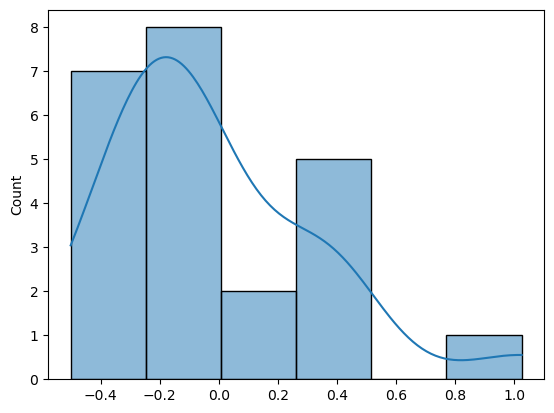

In [483]:
sns.histplot(residuals, kde = True);
plt.show()
#Skewness = 0:The distribution is positively skewed (right-tailed).  # validation is not met

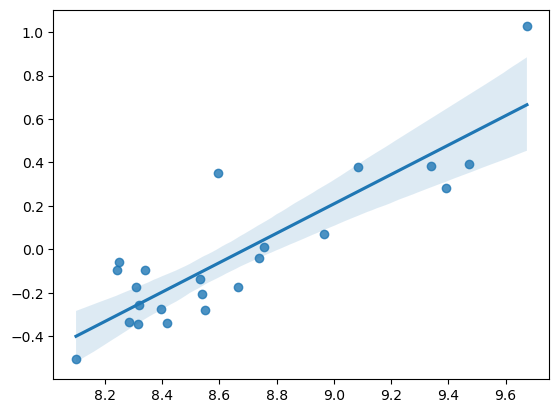

In [484]:
sns.regplot(x= y_test,y = residuals); #  residuals are no randomly distributed around zero and shows pattern(Should not show pattern)
plt.show()

# AOB [Residuals are homoscedastic (constant variance) and uncorrelated with the actual values, indicating a well-fitted model]